# Stock Price Data Analysis - Quantitative Analysis (Task 2)

## Project Overview
This notebook implements **Task 2: Quantitative Analysis** for the News Sentiment Price Prediction project. I will load and analyze historical stock price data for major technology companies, validate data quality, and prepare the foundation for technical indicator calculations.

## Objectives
1. **Stock Data Integration**: Load OHLCV (Open, High, Low, Close, Volume) data from CSV files
2. **Data Validation**: Ensure data quality and structural integrity  
3. **Multiple Stock Loading**: Handle multiple stock symbols efficiently
4. **Foundation Setup**: Prepare data structures for technical analysis in subsequent sections

## Available Datasets
- **AAPL** (Apple Inc.)
- **MSFT** (Microsoft Corporation)  
- **GOOG** (Alphabet Inc.)
- **META** (Meta Platforms Inc.)
- **AMZN** (Amazon.com Inc.)
- **NVDA** (NVIDIA Corporation)

These datasets contain historical daily price data essential for technical analysis and correlation with news sentiment.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from pathlib import Path
from typing import Dict, List, Optional
import warnings

warnings.filterwarnings("ignore")

# Add src directory to path for module imports
project_root = Path.cwd().parent
sys.path.append(str(project_root / "src"))

from core.data_loader import DataLoader
from core.visualizer import Visualizer
from core.financial_analyzer import FinancialAnalyzer

# Configure plotting
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 11

print("✅ Libraries and core modules imported successfully")
print(f"📁 Project root: {project_root}")
print(f"🐍 Python version: {sys.version}")
print(f"🐼 Pandas version: {pd.__version__}")
print(f"📊 Matplotlib version: {plt.matplotlib.__version__}")
print(f"🌊 Seaborn version: {sns.__version__}")
print(f"🔧 Core modules: DataLoader, Visualizer, FinancialAnalyzer")

✅ Libraries and core modules imported successfully
📁 Project root: /home/voldi/Projects/ai-ml/news-sentiment-price-prediction
🐍 Python version: 3.10.12 (main, Aug 15 2025, 14:32:43) [GCC 11.4.0]
🐼 Pandas version: 2.3.3
📊 Matplotlib version: 3.10.7
🌊 Seaborn version: 0.13.2
🔧 Core modules: DataLoader, Visualizer, FinancialAnalyzer


## 1. Initialize Data Loader and Check Available Stock Files

First, I'll initialize the DataLoader class and examine what stock data files are available in the `data/cleaned/` directory.

In [2]:
# Initialize core modules
loader = DataLoader()
visualizer = Visualizer()
analyzer = FinancialAnalyzer()

print("🔍 Initializing data analysis components...")

# Check the cleaned data directory structure
cleaned_data_path = project_root / "data" / "cleaned"
print(f"📂 Cleaned data directory: {cleaned_data_path}")
print(f"📁 Directory exists: {cleaned_data_path.exists()}")

# List all CSV files in the cleaned data directory
if cleaned_data_path.exists():
    csv_files = list(cleaned_data_path.glob("*.csv"))
    print(f"\n📊 Available CSV files ({len(csv_files)}):")
    for file in sorted(csv_files):
        file_size = file.stat().st_size / 1024  # Size in KB
        print(f"  • {file.name} ({file_size:.1f} KB)")

    # Identify stock files (exclude news data)
    stock_files = [
        f
        for f in csv_files
        if f.name.lower() not in ["raw_analyst_ratings.csv", "news_data.csv"]
    ]
    print(f"\n🏢 Stock data files ({len(stock_files)}):")
    stock_symbols = []
    for file in sorted(stock_files):
        symbol = file.stem.upper()  # Extract symbol from filename
        stock_symbols.append(symbol)
        print(f"  • {symbol}: {file.name}")

    print(f"\n📈 Available stock symbols: {stock_symbols}")
else:
    print("❌ Cleaned data directory not found!")
    csv_files = []
    stock_files = []
    stock_symbols = []

🔍 Initializing data analysis components...
📂 Cleaned data directory: /home/voldi/Projects/ai-ml/news-sentiment-price-prediction/data/cleaned
📁 Directory exists: True

📊 Available CSV files (6):
  • AAPL.csv (352.3 KB)
  • AMZN.csv (341.3 KB)
  • GOOG.csv (350.2 KB)
  • META.csv (270.6 KB)
  • MSFT.csv (349.2 KB)
  • NVDA.csv (359.2 KB)

🏢 Stock data files (6):
  • AAPL: AAPL.csv
  • AMZN: AMZN.csv
  • GOOG: GOOG.csv
  • META: META.csv
  • MSFT: MSFT.csv
  • NVDA: NVDA.csv

📈 Available stock symbols: ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA']


## 2. Load and Analyze Individual Stock Data

I'll now load individual stock data files to examine their structure, validate the OHLCV format, and perform initial quality checks.

In [3]:
# Load stock data for a sample symbol using DataLoader
sample_file = None
if cleaned_data_path.exists() and stock_files:
    # Look for AAPL first, then any available stock file
    for preferred in ["aapl.csv", "AAPL.csv"]:
        potential_file = cleaned_data_path / preferred
        if potential_file.exists():
            sample_file = potential_file
            break

    if not sample_file:
        # Use the first available stock file
        sample_file = stock_files[0]

if sample_file:
    print(f"📊 Loading sample stock data: {sample_file.name}")

    try:
        # Load using DataLoader class
        stock_data = loader.load_stock_data(str(sample_file))
        symbol = sample_file.stem.upper()

        print(f"✅ Successfully loaded {symbol} data")
        print(f"📏 Dataset shape: {stock_data.shape}")
        print(f"📅 Date range: {stock_data.index.min()} to {stock_data.index.max()}")
        print(f"🔢 Total trading days: {len(stock_data)}")

        # Display basic information
        print(f"\n📋 Dataset Info:")
        print(f"Columns: {list(stock_data.columns)}")
        print(f"Data types:\n{stock_data.dtypes}")

        # Display first and last few rows
        print(f"\n📈 First 5 rows:")
        print(stock_data.head())

        print(f"\n📈 Last 5 rows:")
        print(stock_data.tail())

        # Basic statistics
        print(f"\n📊 Descriptive Statistics:")
        print(stock_data.describe())

    except Exception as e:
        print(f"❌ Error loading {sample_file.name}: {str(e)}")
        stock_data = None
        symbol = None
else:
    print("❌ No stock data files found in cleaned data directory")
    stock_data = None
    symbol = None

📊 Loading sample stock data: AAPL.csv
✅ Successfully loaded AAPL data
📏 Dataset shape: (3774, 5)
📅 Date range: 2009-01-02 00:00:00 to 2023-12-29 00:00:00
🔢 Total trading days: 3774

📋 Dataset Info:
Columns: ['Close', 'High', 'Low', 'Open', 'Volume']
Data types:
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

📈 First 5 rows:
               Close      High       Low      Open      Volume
Date                                                          
2009-01-02  2.721686  2.730385  2.554037  2.575630   746015200
2009-01-05  2.836553  2.884539  2.780469  2.794266  1181608400
2009-01-06  2.789767  2.914229  2.770872  2.877641  1289310400
2009-01-07  2.729484  2.774170  2.706990  2.753477   753048800
2009-01-08  2.780169  2.793666  2.700393  2.712090   673500800

📈 Last 5 rows:
                 Close        High         Low        Open    Volume
Date                                                                
2023-12-22  191.788757

## 3. Data Quality Analysis and Visualization

Now I'll perform comprehensive data quality checks and create visualizations to understand the stock price patterns.

In [4]:
# Perform comprehensive data quality analysis using FinancialAnalyzer
if stock_data is not None:
    print(f"🔍 Performing data quality analysis for {symbol}")

    # Use FinancialAnalyzer to get data quality report
    quality_report = analyzer.get_data_quality_report(stock_data)

    print(f"\n📊 Data Quality Report:")
    print("=" * 50)

    print(f"📏 Total records: {quality_report['total_records']}")

    if quality_report["date_range"]["start"]:
        print(
            f"📅 Date range: {quality_report['date_range']['start'].strftime('%Y-%m-%d')} to {quality_report['date_range']['end'].strftime('%Y-%m-%d')}"
        )

    # Missing values check
    missing_any = any(count > 0 for count in quality_report["missing_values"].values())
    if missing_any:
        print(f"⚠️ Missing values detected:")
        for col, count in quality_report["missing_values"].items():
            if count > 0:
                pct = quality_report["missing_percentage"][col]
                print(f"  • {col}: {count} ({pct:.1f}%)")
    else:
        print("✅ No missing values found")

    # OHLCV validation
    if "ohlcv_valid" in quality_report:
        print(f"\n🔍 OHLCV Validation:")
        validations = quality_report["ohlcv_valid"]

        for check, is_valid in validations.items():
            status = "✅ Valid" if is_valid else "❌ Invalid"
            check_name = check.replace("_", " ").title()
            print(f"  • {check_name}: {status}")

    # Calculate financial metrics using FinancialAnalyzer
    print(f"\n💰 Financial Metrics Analysis:")

    performance_metrics = analyzer.calculate_performance_metrics(stock_data)

    print(f"  • Total Return: {performance_metrics['total_return_pct']:.2f}%")
    print(f"  • Annualized Return: {performance_metrics['annualized_return_pct']:.2f}%")
    print(f"  • Volatility (Annualized): {performance_metrics['volatility_pct']:.2f}%")
    print(f"  • Sharpe Ratio: {performance_metrics['sharpe_ratio']:.3f}")
    print(f"  • Max Drawdown: {performance_metrics['max_drawdown_pct']:.2f}%")
    print(f"  • Win Rate: {performance_metrics['win_rate_pct']:.1f}%")
    print(f"  • Positive Days: {performance_metrics['positive_days']}")
    print(f"  • Negative Days: {performance_metrics['negative_days']}")

    print(f"\n✅ Data quality and financial analysis complete!")
else:
    print("❌ Cannot perform analysis - no stock data loaded")

🔍 Performing data quality analysis for AAPL

📊 Data Quality Report:
📏 Total records: 3774
📅 Date range: 2009-01-02 to 2023-12-29
✅ No missing values found

🔍 OHLCV Validation:
  • High Gte Low: ✅ Valid
  • High Gte Open: ✅ Valid
  • High Gte Close: ✅ Valid
  • Low Lte Open: ✅ Valid
  • Low Lte Close: ✅ Valid
  • Volume Non Negative: ✅ Valid
  • Prices Positive: ✅ Valid

💰 Financial Metrics Analysis:
  • Total Return: 6907.74%
  • Annualized Return: 32.81%
  • Volatility (Annualized): 28.59%
  • Sharpe Ratio: 1.066
  • Max Drawdown: 43.80%
  • Win Rate: 53.1%
  • Positive Days: 2003
  • Negative Days: 1763

✅ Data quality and financial analysis complete!


📊 Creating professional visualizations for AAPL using Visualizer class...


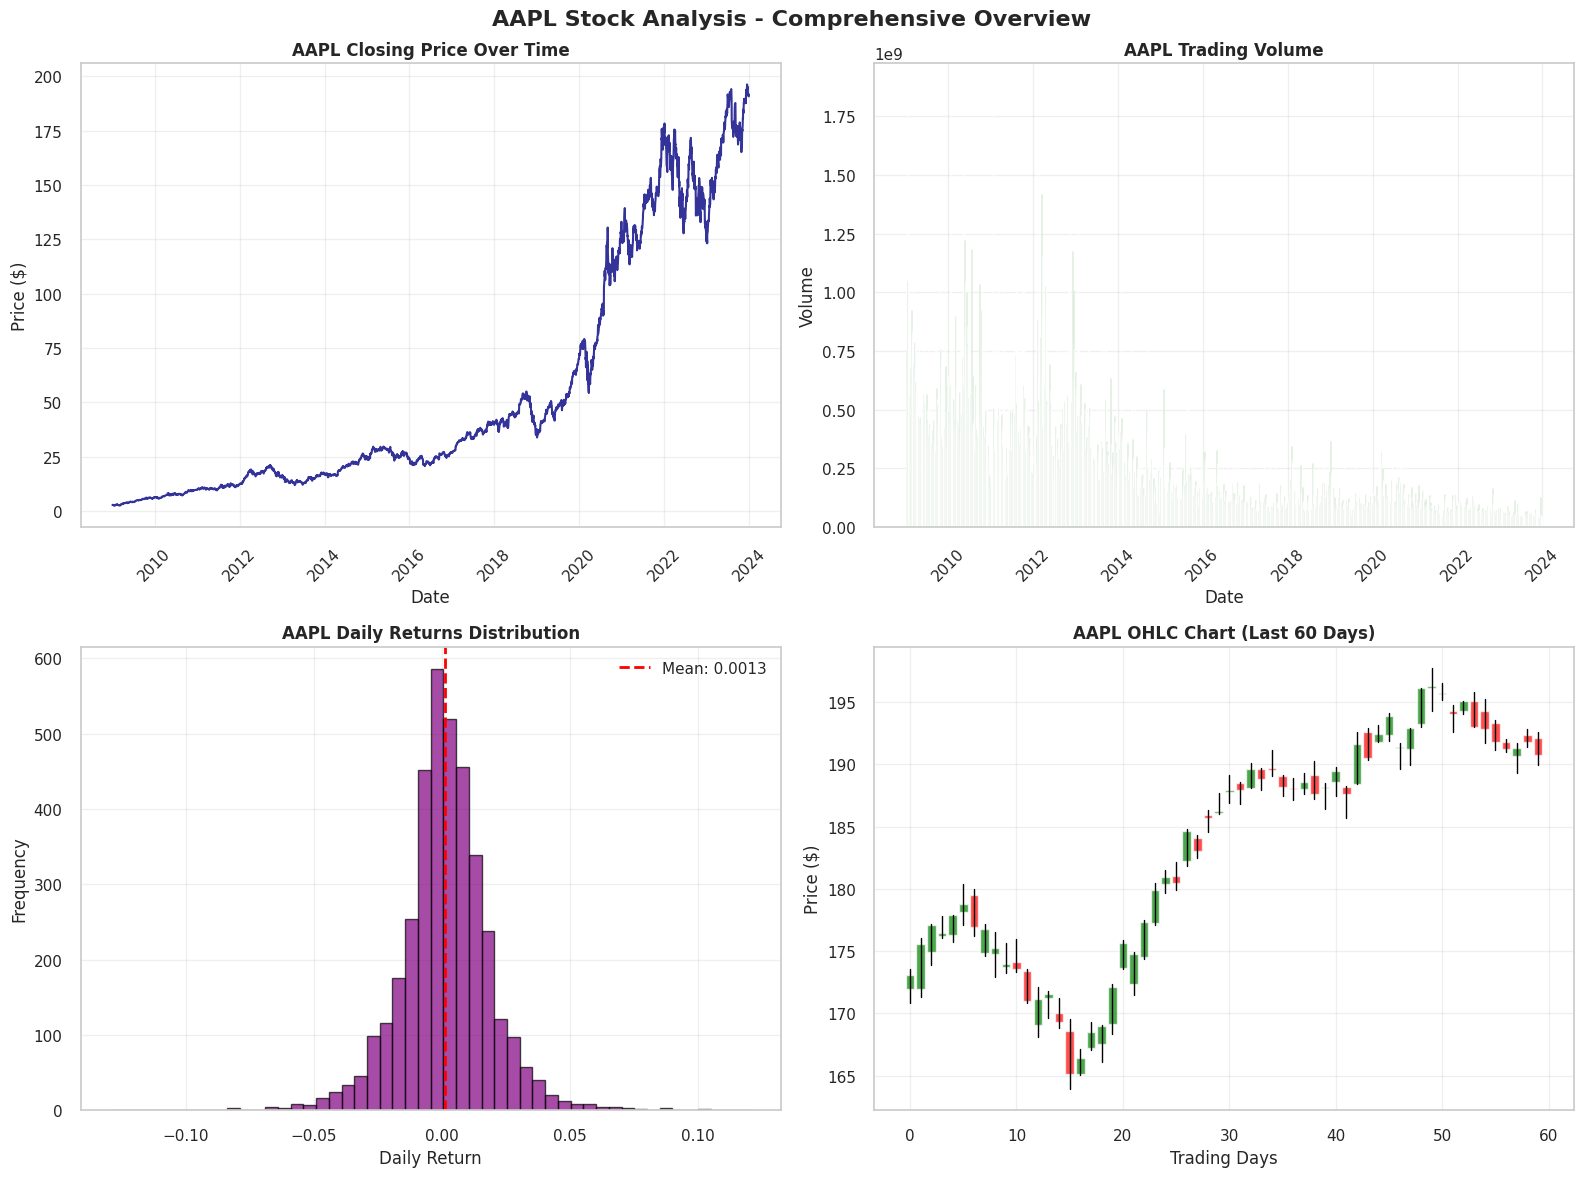

✅ Stock overview visualization created successfully!


In [5]:
# Create professional visualizations using Visualizer class
if stock_data is not None and symbol:
    print(
        f"📊 Creating professional visualizations for {symbol} using Visualizer class..."
    )

    # Use Visualizer's plot_stock_overview method
    visualizer.plot_stock_overview(stock_data, symbol)

    print(f"✅ Stock overview visualization created successfully!")
else:
    print("❌ Cannot create visualizations - no stock data loaded")

## 4. Load Multiple Stock Datasets

Now I'll demonstrate the DataLoader's capability to handle multiple stock files simultaneously, which is essential for portfolio analysis and cross-stock correlation studies.

In [6]:
# Load multiple stock datasets using DataLoader's enhanced method
if cleaned_data_path.exists() and stock_files:
    print("📊 Loading multiple stock datasets using DataLoader...")

    # Prepare list of stock file paths
    stock_file_paths = [str(file) for file in stock_files]
    expected_symbols = [file.stem.upper() for file in stock_files]

    print(f"📁 Found {len(stock_file_paths)} stock files to load")
    print(f"🏢 Expected symbols: {expected_symbols}")

    if stock_file_paths:
        try:
            # Use DataLoader's load_multiple_stocks method with correct parameter order
            multiple_stocks = loader.load_multiple_stocks(file_paths=stock_file_paths)

            print(f"✅ Successfully loaded {len(multiple_stocks)} stock datasets")

            # Use FinancialAnalyzer to analyze all stocks
            print(f"\n📊 Analyzing performance metrics for all stocks...")

            all_performance = analyzer.analyze_multiple_stocks(multiple_stocks)

            # Display summary information for each stock
            print(f"\n📊 Multi-Stock Performance Summary:")
            print("=" * 80)

            for symbol, metrics in all_performance.items():
                data = multiple_stocks[symbol]

                # Handle different index types (datetime vs integer)
                if isinstance(data.index, pd.DatetimeIndex):
                    start_date = data.index.min().strftime("%Y-%m-%d")
                    end_date = data.index.max().strftime("%Y-%m-%d")
                else:
                    start_date = str(data.index.min())
                    end_date = str(data.index.max())

                num_records = len(data)

                print(
                    f"{symbol:>6}: {num_records:>5} records | {start_date} to {end_date}"
                )
                print(
                    f"        Total Return: {metrics['total_return_pct']:>8.2f}% | Sharpe: {metrics['sharpe_ratio']:>6.3f} | Max DD: {metrics['max_drawdown_pct']:>6.2f}%"
                )

            # Calculate correlation matrix using FinancialAnalyzer
            print(f"\n🔗 Calculating correlation matrix...")

            correlation_matrix = analyzer.calculate_correlation_matrix(multiple_stocks)

            print(f"📊 Stock Price Correlation Matrix:")
            print(correlation_matrix.round(3))

            print(f"\n✅ Multiple stock loading and analysis complete!")

        except Exception as e:
            print(f"❌ Error loading multiple stocks: {str(e)}")
            import traceback

            traceback.print_exc()
            multiple_stocks = None
            all_performance = None
            correlation_matrix = None
    else:
        print("❌ No stock files found to load")
        multiple_stocks = None
        all_performance = None
        correlation_matrix = None
else:
    print("❌ Cannot load multiple stocks - data directory not accessible")
    multiple_stocks = None
    all_performance = None
    correlation_matrix = None

📊 Loading multiple stock datasets using DataLoader...
📁 Found 6 stock files to load
🏢 Expected symbols: ['AAPL', 'MSFT', 'META', 'NVDA', 'AMZN', 'GOOG']
✅ Loaded AAPL: 3774 records
✅ Loaded MSFT: 3774 records
✅ Loaded META: 2923 records
✅ Loaded NVDA: 3774 records
✅ Loaded AMZN: 3774 records
✅ Loaded GOOG: 3774 records
✅ Successfully loaded 6 stock datasets

📊 Analyzing performance metrics for all stocks...

📊 Multi-Stock Performance Summary:
  AAPL:  3774 records | 2009-01-02 to 2023-12-29
        Total Return:  6907.74% | Sharpe:  1.066 | Max DD:  43.80%
  MSFT:  3774 records | 2009-01-02 to 2023-12-29
        Total Return:  2395.86% | Sharpe:  0.861 | Max DD:  37.15%
  META:  2923 records | 2012-05-18 to 2023-12-29
        Total Return:   825.87% | Sharpe:  0.630 | Max DD:  76.74%
  NVDA:  3774 records | 2009-01-02 to 2023-12-29
        Total Return: 24691.75% | Sharpe:  0.987 | Max DD:  66.34%
  AMZN:  3774 records | 2009-01-02 to 2023-12-29
        Total Return:  5490.14% | Sharpe

## 5. Cross-Stock Analysis and Comparative Visualization

I'll create comparative visualizations to understand relationships between different stocks, which will be crucial for portfolio-level sentiment analysis.

📊 Creating multi-stock comparative visualizations using Visualizer class...
📈 Creating visualizations for stocks: ['AAPL', 'MSFT', 'META', 'NVDA', 'AMZN', 'GOOG']


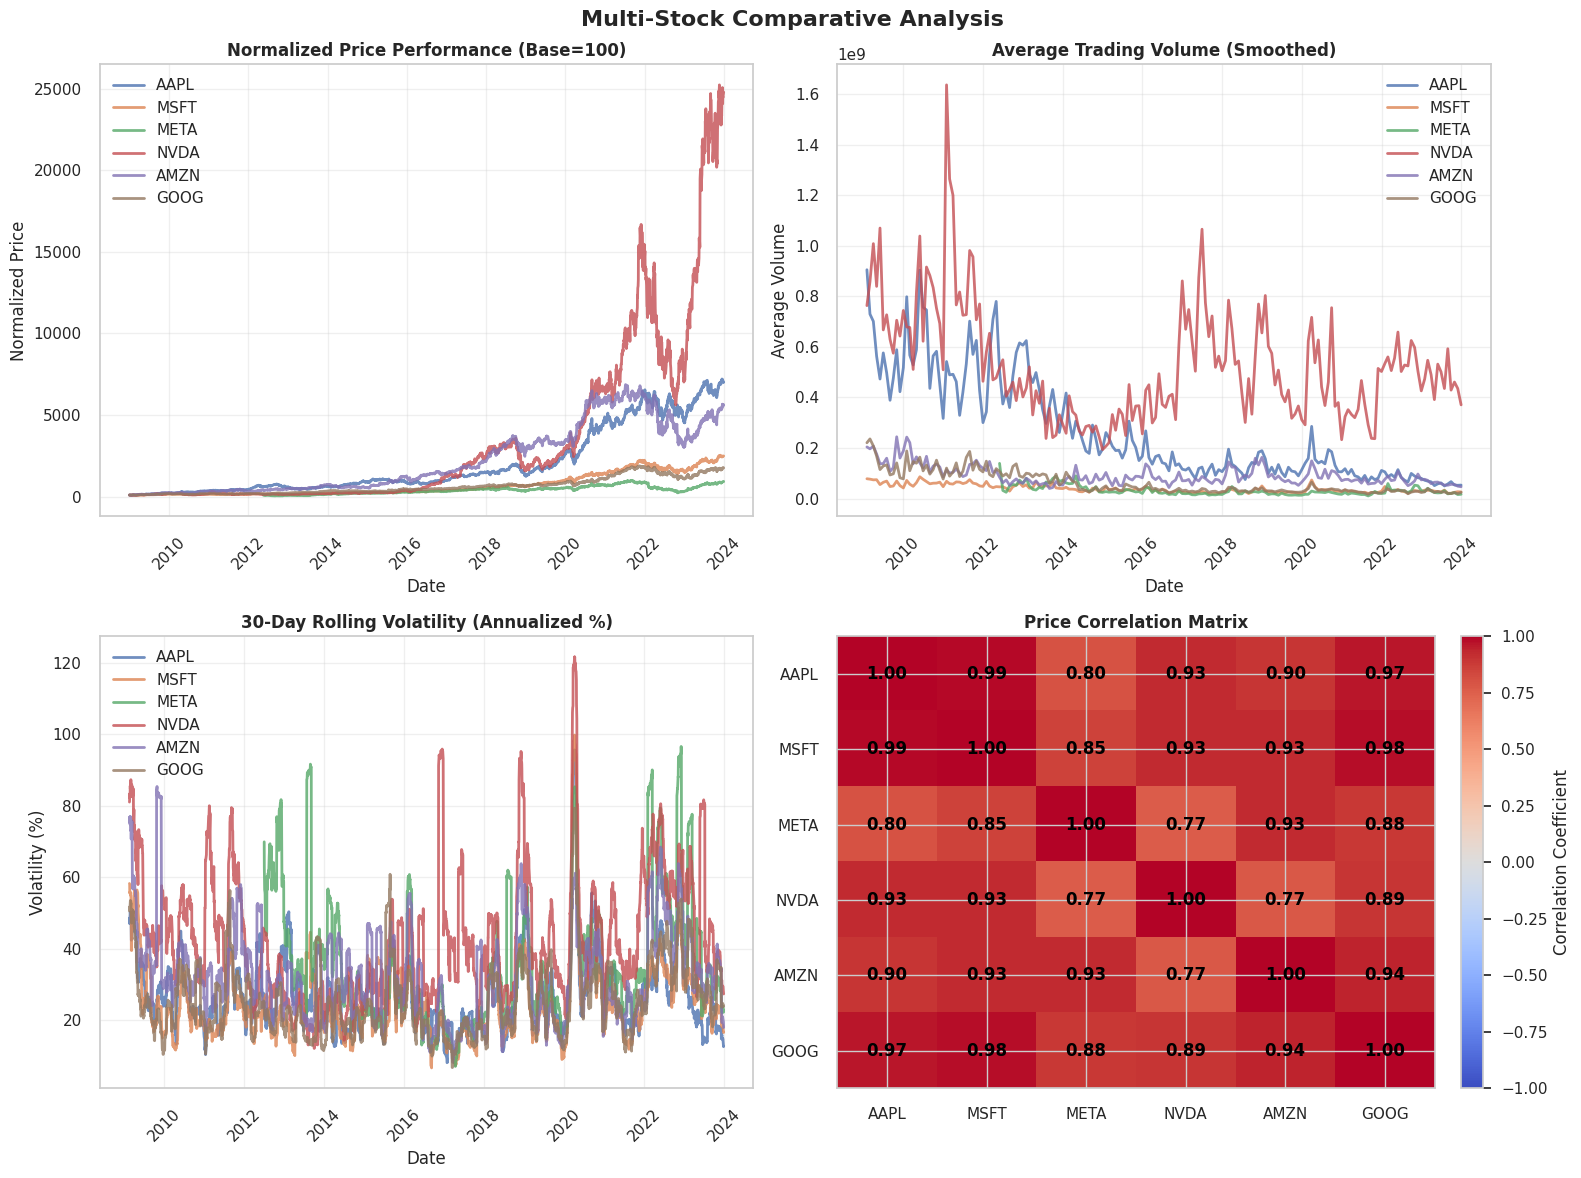


📊 Creating performance metrics visualization...


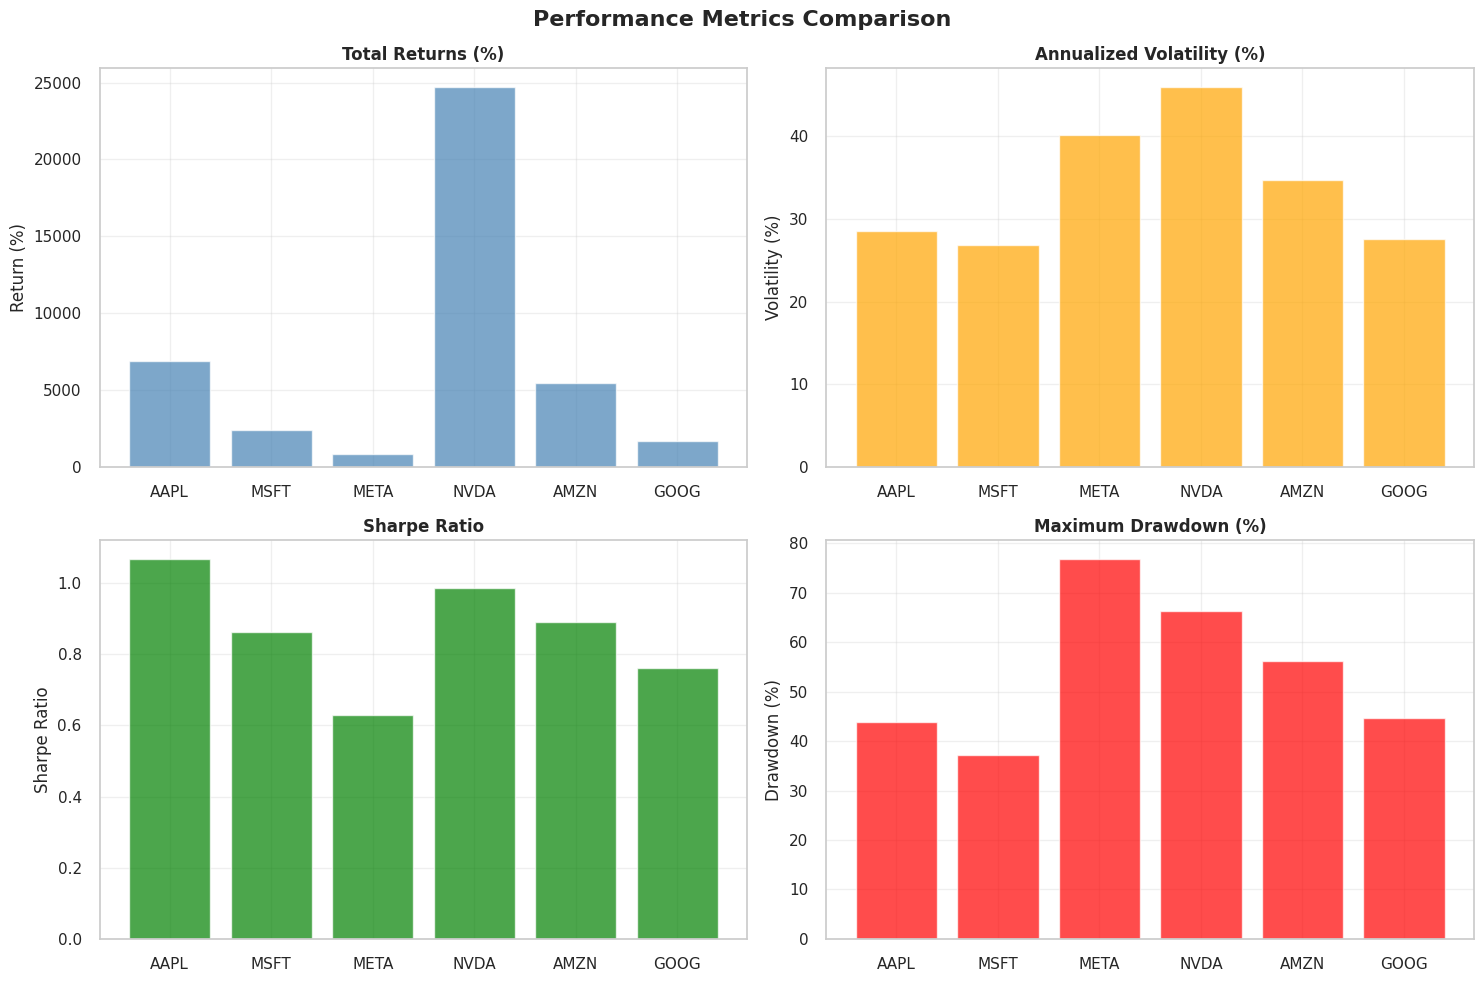


📊 Creating enhanced correlation heatmap...


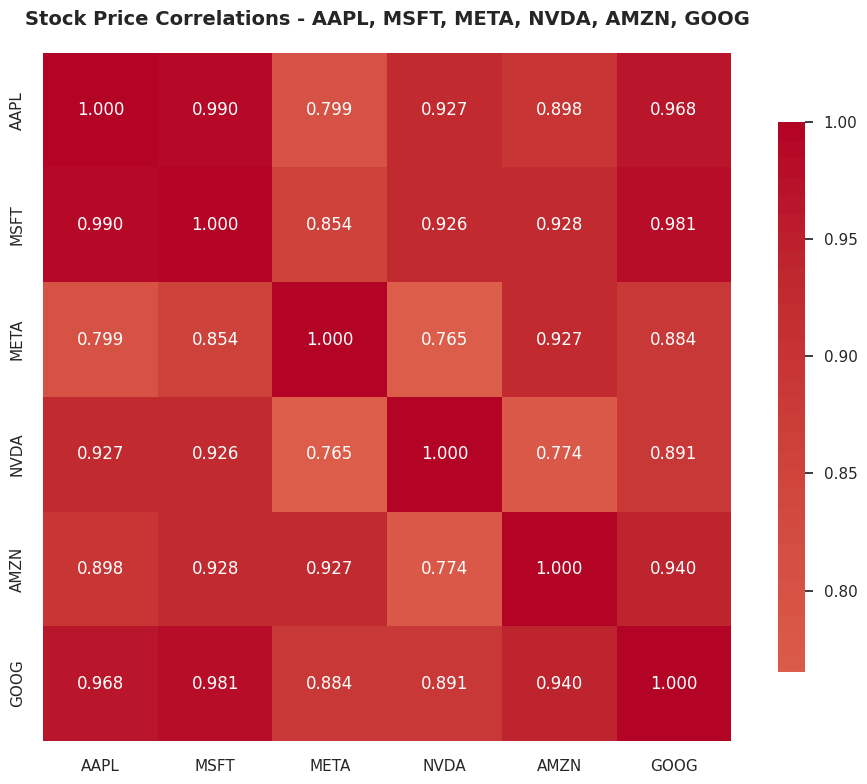


🔍 Key Insights from Cross-Stock Analysis:

📈 Performance Metrics Comparison:
  AAPL: Return: 6907.7% | Volatility:  28.6% | Sharpe:  1.07
  MSFT: Return: 2395.9% | Volatility:  26.8% | Sharpe:  0.86
  META: Return:  825.9% | Volatility:  40.1% | Sharpe:  0.63
  NVDA: Return: 24691.8% | Volatility:  45.9% | Sharpe:  0.99
  AMZN: Return: 5490.1% | Volatility:  34.7% | Sharpe:  0.89
  GOOG: Return: 1661.0% | Volatility:  27.5% | Sharpe:  0.76

🔗 Notable Correlations (>0.5):
  • AAPL - MSFT: 0.990
  • MSFT - GOOG: 0.981
  • AAPL - GOOG: 0.968
  • AMZN - GOOG: 0.940
  • MSFT - AMZN: 0.928

✅ Comprehensive multi-stock analysis and visualization complete!


In [9]:
# Create comprehensive multi-stock visualizations using Visualizer class
if "multiple_stocks" in locals() and multiple_stocks is not None:
    print(
        "📊 Creating multi-stock comparative visualizations using Visualizer class..."
    )

    # Limit to first 4 stocks for clarity in visualizations
    selected_symbols = list(multiple_stocks.keys())
    print(f"📈 Creating visualizations for stocks: {selected_symbols}")

    # Use Visualizer's plot_multi_stock_comparison method
    visualizer.plot_multi_stock_comparison(multiple_stocks, symbols=selected_symbols)

    # Use Visualizer's plot_performance_metrics method if we have performance data
    if "all_performance" in locals() and all_performance is not None:
        print(f"\n📊 Creating performance metrics visualization...")

        # Filter performance data for selected symbols
        selected_performance = {
            symbol: all_performance[symbol]
            for symbol in selected_symbols
            if symbol in all_performance
        }

        visualizer.plot_performance_metrics(selected_performance)

    # Use Visualizer's correlation heatmap method
    if "correlation_matrix" in locals() and correlation_matrix is not None:
        print(f"\n📊 Creating enhanced correlation heatmap...")

        # Filter correlation matrix for selected symbols
        selected_correlation = correlation_matrix.loc[
            selected_symbols, selected_symbols
        ]

        visualizer.plot_correlation_heatmap(
            selected_correlation,
            title=f"Stock Price Correlations - {', '.join(selected_symbols)}",
        )

    # Display key insights using FinancialAnalyzer
    print(f"\n🔍 Key Insights from Cross-Stock Analysis:")
    print("=" * 60)

    # Performance comparison
    if all_performance:
        print(f"\n📈 Performance Metrics Comparison:")
        for symbol in selected_symbols:
            if symbol in all_performance:
                metrics = all_performance[symbol]
                print(
                    f"{symbol:>6}: Return: {metrics['total_return_pct']:>6.1f}% | "
                    f"Volatility: {metrics['volatility_pct']:>5.1f}% | "
                    f"Sharpe: {metrics['sharpe_ratio']:>5.2f}"
                )

    # Correlation insights using FinancialAnalyzer
    if correlation_matrix is not None:
        correlation_insights = analyzer.get_correlation_insights(
            correlation_matrix.loc[selected_symbols, selected_symbols], threshold=0.5
        )

        print(f"\n🔗 Notable Correlations (>0.5):")
        if correlation_insights:
            for stock1, stock2, corr_value in correlation_insights[:5]:  # Show top 5
                print(f"  • {stock1} - {stock2}: {corr_value:.3f}")
        else:
            print("  • No correlations above 0.5 threshold found")

    print(f"\n✅ Comprehensive multi-stock analysis and visualization complete!")

else:
    print("❌ Cannot perform cross-stock analysis - multiple stocks not loaded")